**Directing Customers to Subscription Products through App Behaviour Analysis**

**A Fintech Case Study**

In today's market many companies have a mobile presence. Often, these companies provide free products/services in their mobile apps in an attempt to transition their customers to a paid membership. Some examples of paid products, which originate from free ones, are ***An example could be YouTube Premium***, and You Need a Budget. Since marketing efforts are never free, these companies need to know exactly who to target with offers and promotions.

- **Market:** The target audience is customers who use a company's free products. In this case study, this refers to users who installed (and used) the companies free mobile app.

- **Product:** The paid memberships often provide enhanced versions of the free products already given for free, alongside new features. For example, Youtube Premium provides ads free video.

- **Goal:** The objective of this model is to predict which users will not subscribe to the paid membership, so that greater marketing efforts can go into trying to convert them to paid users.

**Business Challenge**
- In this Case Study we will be working for a fintech company that wants to provide its customers with a paid mobile app subscription that will allow them to track all of their finances in one place. To attract customers, the company releases a free version of their app with some of the main features unlocked.

- The company has tasked you to identify which users will mostly likely NOT enroll in paid products, so that additional offers can be given to them. Because of the costs of these offers, the company does not want to offer them to everybody, especially customers who were going to enroll anyways.

**Data Description**
- **User** : this is Unique id of each particular user of app
- **first_open** : this is the date/month/year, time the user first time opened the app
- **dayofweek** : this shows the day out of 7 days a week the user joins the app where 0:Sunday & 6:Saturday
- **hour** : This is outoff 24 hour of day the user 1st open the app
- **age** :  age of the user
- **screen_list** : This describe the every single screen name the user visited in that 1st 24-hour (screen name seperated by comma)
- **numscreens** : The Number of screen the user visited in 1st 24 hour
- **minigame** : The app has minigame feature, this shows whether the user played any minigame or Not (1:Played, 0: Not Played)
- **liked** : There are like button for each feature in the app, shows whether the user cliked any like button of any feature in app or NOT (1: click like button, 0: Not clicked)
- **used_premium_feature** : This shows whether the user used any premium feature (that is for free in 1st 24 hour) or not in 1st 24 hour (1: used, 0: not used)
- **enrolled** : This is target that shows whether the user enrolled to premium after the free trial (1: enrolled, 0: not enrolled)
- **enrolled_date** : date & time of enrollment to premium product if they enrolled to premium

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from dateutil import parser
import datetime

In [3]:
df = pd.read_csv('appdata.csv')

In [4]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled,enrolled_date
0,235136,27-12-2012 02:14,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0,NaN
1,333588,02-12-2012 01:16,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,NaN
2,254414,19-03-2013 19:19,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,1,0,NaN
3,234192,05-07-2013 16:08,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,0,1,05-07-2013 16:11
4,51549,26-02-2013 18:50,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,1,0,1,26-02-2013 18:56


In [5]:
df.shape

(50000, 12)

**EDA**

In [6]:
df.describe()

,user,dayofweek,age,numscreens,minigame,liked,used_premium_feature,enrolled
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.165000,0.172020,0.621480
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.371184,0.377402,0.485023
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,0.000000,1.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,0.000000,1.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


**Some Observations:**
- The average age of the user is around 32 years
- On an average, user visits 21 screens, also 10.78% of users play minigame
   16.5% of users liked features of app, 17.2% of users used premium features of app and 62% enrolled to premium

In [7]:
# Let's convert the hour column into the integer format
df['hour'] = df.hour.str.slice(1,3).astype(int)

In [9]:
df.head(2)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled,enrolled_date
0,235136,27-12-2012 02:14,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0,NaN
1,333588,02-12-2012 01:16,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,NaN


In [10]:
# To plot, lets create dataframe with only numerical columns
df1 = df.copy().drop(columns=['user','first_open','screen_list','enrolled_date','enrolled'])

In [11]:
df1.head(2)

,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0


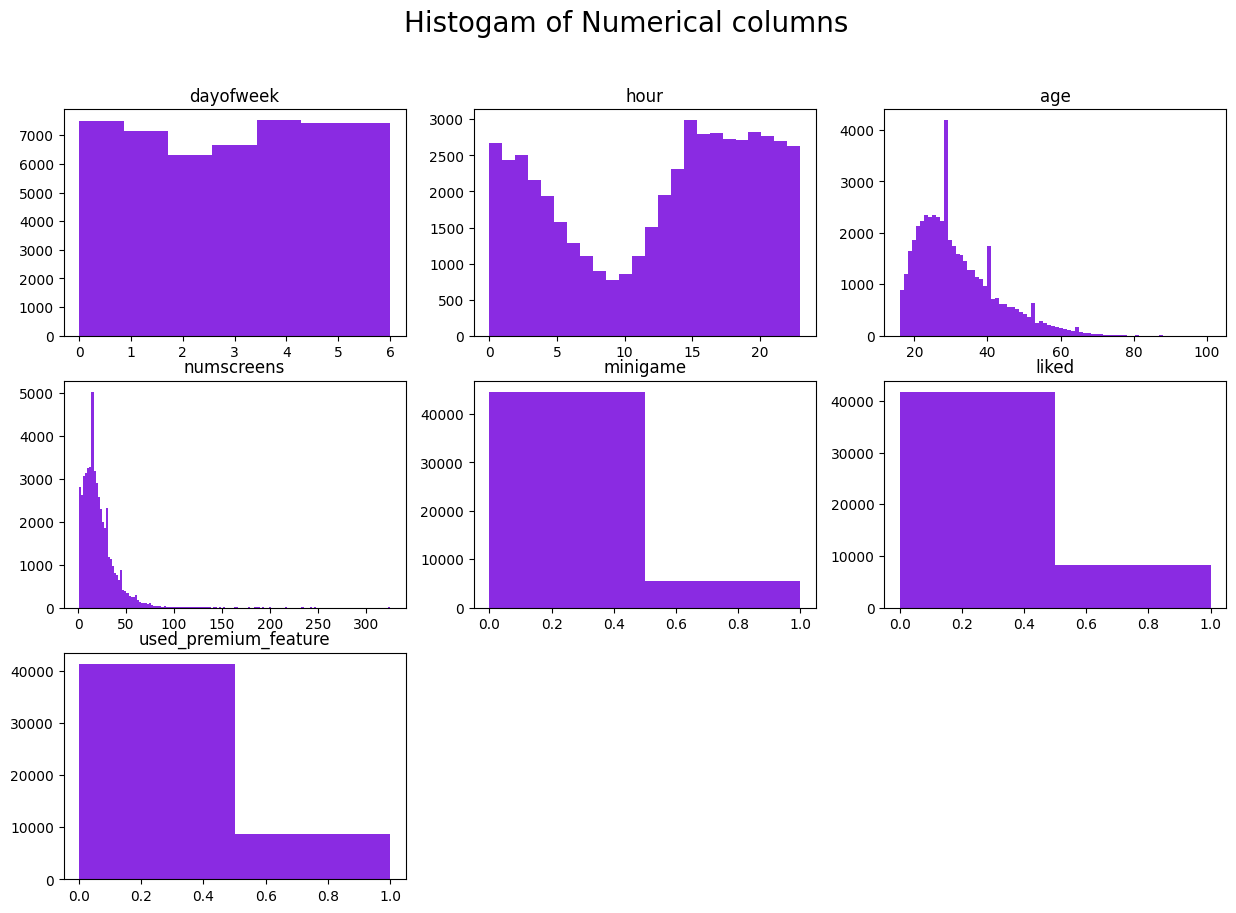

In [13]:
# Let's Plot Histogram for all numerical columns to know the disribution of these features
plt.figure(figsize=(15,10))
plt.suptitle('Histogam of Numerical columns', fontsize= 20)
for i in range(1, df1.shape[1] + 1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(df1.columns.values[i-1])

    vals = np.size(df1.iloc[:,i-1].unique())

    plt.hist(df1.iloc[:,i-1], bins=vals, color='#8A2BE2')

**Observation**
- On Weekends more number of users join the app
- Between 5am to 3pm the most users donot first open the app
- Most of the users are aged around 30 years
- Most of the users visited around 20 screens of the app
- Not many users played minigame
- not many users pressed the like button
- Not many users used premium features in the first 24 hours

<Axes: title={'center': 'Correlation with Response/target Variable'}>

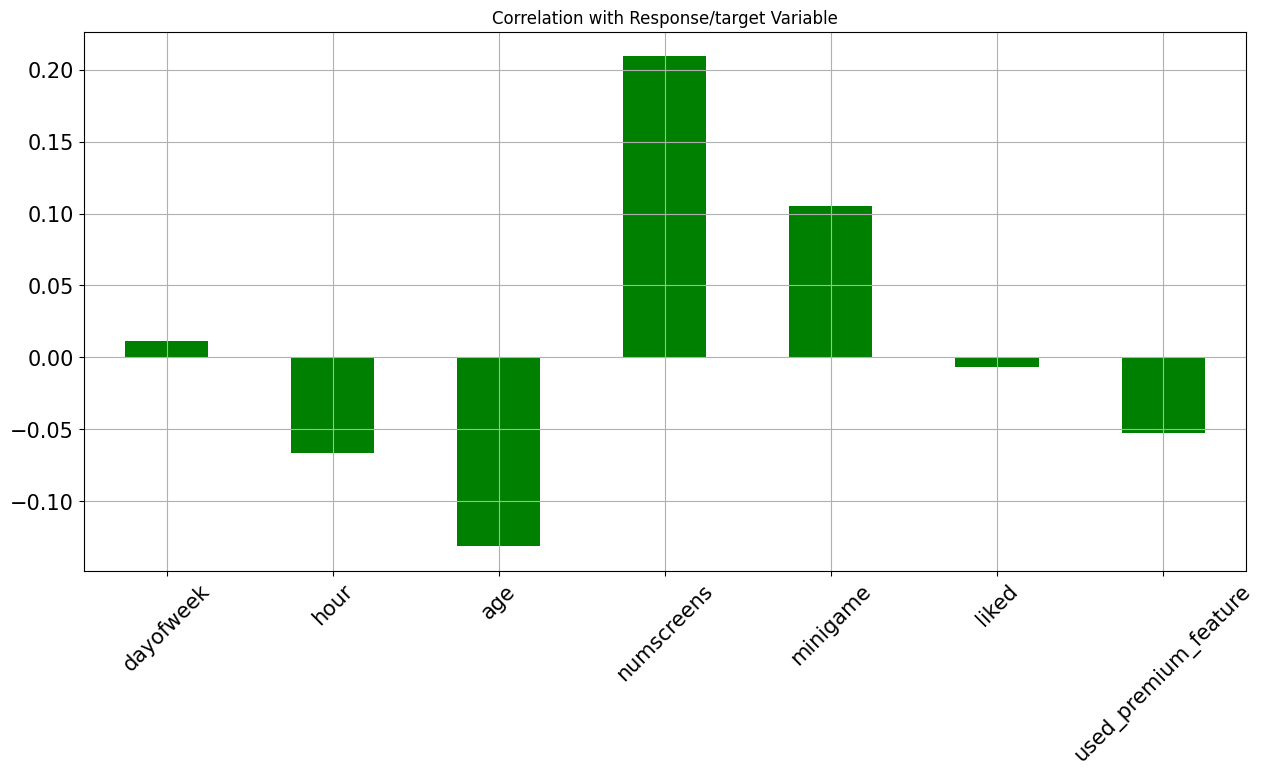

In [14]:
# Let's see the correlation between independent features & response/target variable
df1.corrwith(df.enrolled).plot.bar(figsize=(15,7),title='Correlation with Response/target Variable',
                                   fontsize=15, rot=45, grid=True, color='Green')

**Observations**:
- dayofweek is least positively correlated & says that if someone joins the app on day 0(sunday) then they're  most likely to get enrolled to the premium features
- Hour is negatively correlated with target variable shows the earlier the hour(in night) the most likely to get enrolled
- age is also negatively correlated reflects that the younger users are most likely to get enrolled
- Numscreen is positively correlated with target shows that more the no. of screen user visits more chances of getting enrolled
- minigame also shows that more the minigame user play more chances of getting enrolled
- liked is very least negative which does not have much impact in target
- interestingly used_premium_feature is negatively correlated with response meaning that if user used the premium feature in 1st 24 hour that he/she might not enroll after the trial version of premium features

<ipython-input-15-58b23f86126b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Blues')


<Axes: >

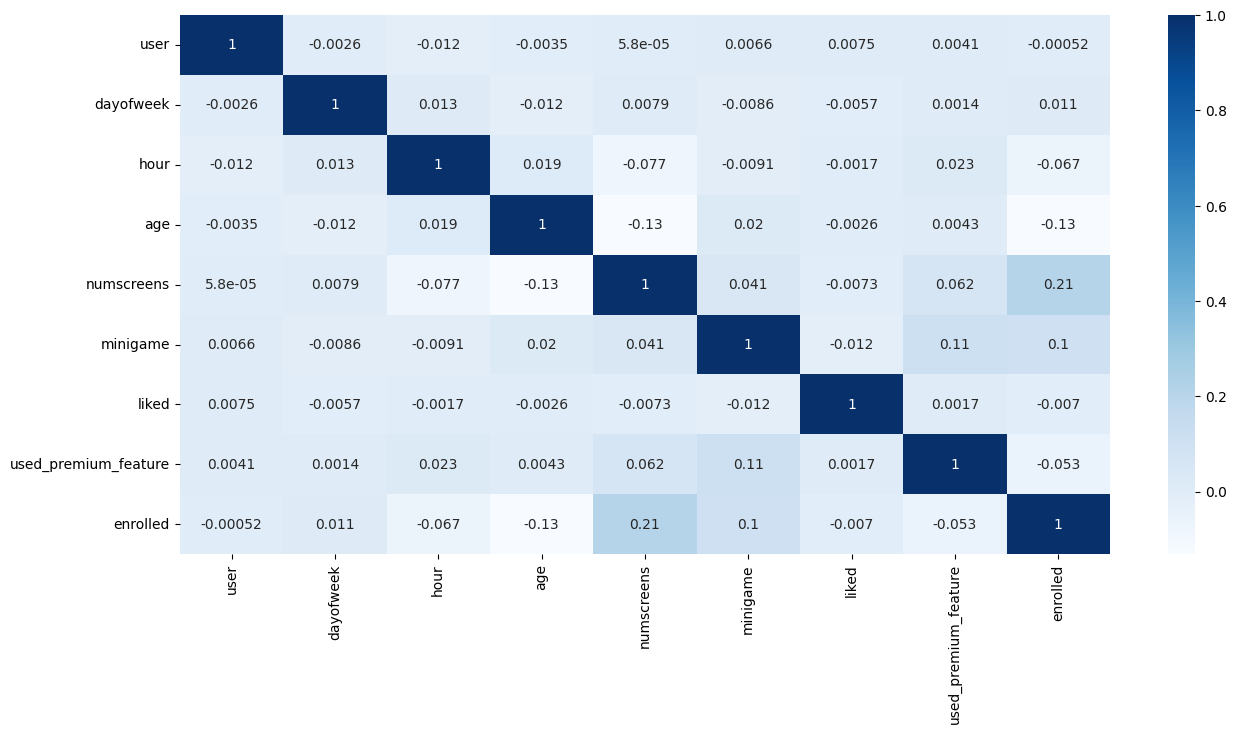

In [15]:
# Let's see the correlation matrix to see the relation between all the feature in the dataset, also can see the linear relation
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

All the independent features are having very less correlation among themselves, so their is very less chance of multicollinearity problem

**Feature Engineering - Response variable**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  int64 
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   liked                 50000 non-null  int64 
 9   used_premium_feature  50000 non-null  int64 
 10  enrolled              50000 non-null  int64 
 11  enrolled_date         31074 non-null  object
dtypes: int64(9), object(3)
memory usage: 4.6+ MB


In [17]:
# converting date column into std python date formate
df['first_open'] = pd.to_datetime(df['first_open'])
df['enrolled_date'] = pd.to_datetime(df['enrolled_date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user                  50000 non-null  int64         
 1   first_open            50000 non-null  datetime64[ns]
 2   dayofweek             50000 non-null  int64         
 3   hour                  50000 non-null  int64         
 4   age                   50000 non-null  int64         
 5   screen_list           50000 non-null  object        
 6   numscreens            50000 non-null  int64         
 7   minigame              50000 non-null  int64         
 8   liked                 50000 non-null  int64         
 9   used_premium_feature  50000 non-null  int64         
 10  enrolled              50000 non-null  int64         
 11  enrolled_date         31074 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(9), object(1)
memory usage: 4.6+ MB


In [19]:
# Let's create a new feature of difference between dates in hours to find the cut-off for enrolled
df['Date_Delta_in_Hour'] = (df.enrolled_date-df.first_open).abs().astype('timedelta64[h]')

In [20]:
df.Date_Delta_in_Hour[df.Date_Delta_in_Hour<0]

Series([], Name: Date_Delta_in_Hour, dtype: float64)

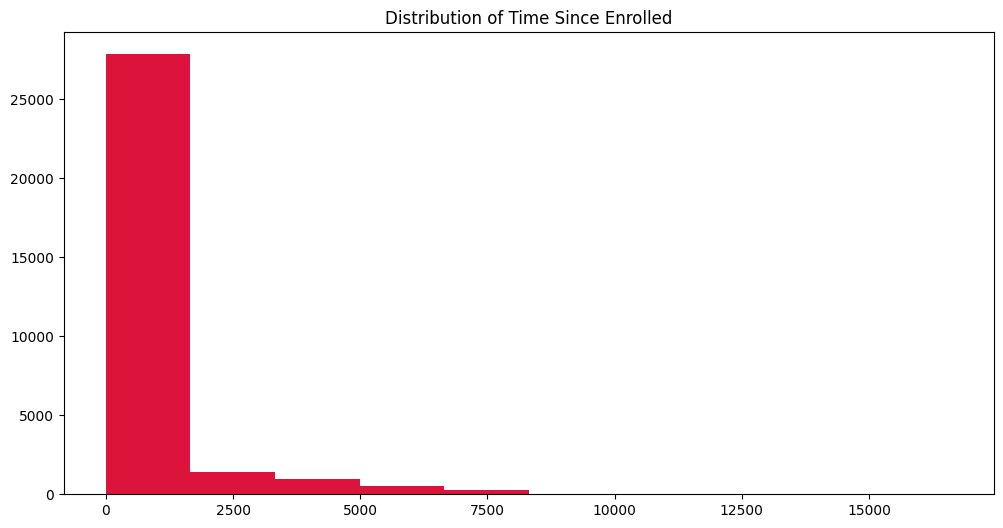

In [22]:
plt.figure(figsize=(12,6))
plt.hist(df['Date_Delta_in_Hour'].dropna(),color='#DC143C')
plt.title('Distribution of Time Since Enrolled')
plt.show()

Here we observe that most of users enrolled in 1st 2000 Hour but their might be case that most enrollment is in 1st 100 or 500 hours, lets zoom the plot

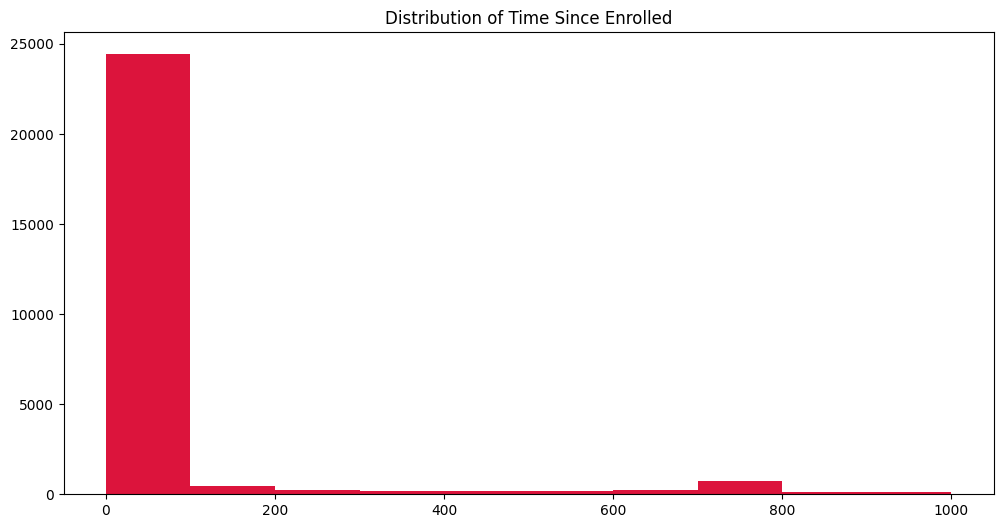

In [23]:
plt.figure(figsize=(12,6))
plt.hist(df['Date_Delta_in_Hour'].dropna(),color='#DC143C', range=[0,1000])
plt.title('Distribution of Time Since Enrolled')
plt.show()

Here we observe that most of users enrolled in 1st 100 Hour but let's zoom the plot again

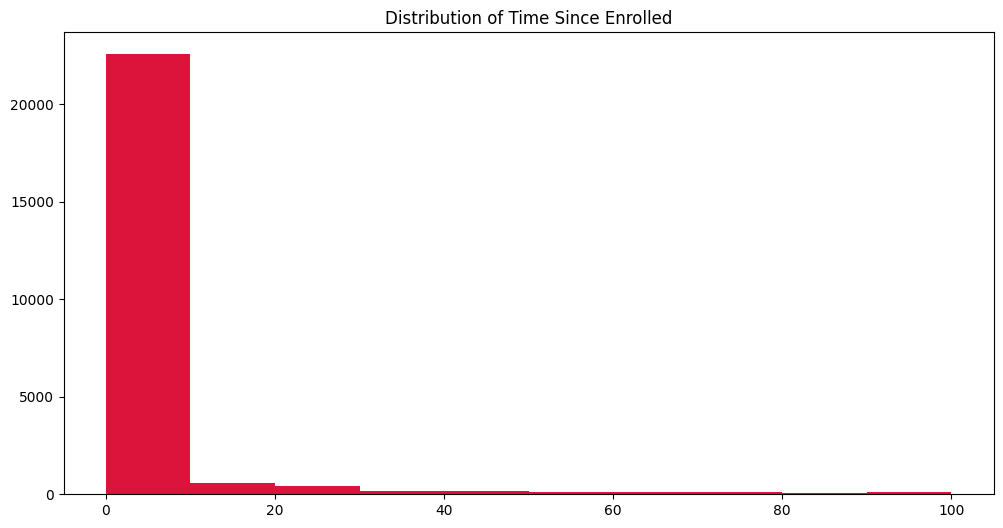

In [24]:
plt.figure(figsize=(12,6))
plt.hist(df['Date_Delta_in_Hour'].dropna(),color='#DC143C', range=[0,100])
plt.title('Distribution of Time Since Enrolled')
plt.show()

Here we observe that most of users enrolled in 1st 10 Hour but let's zoom the plot a bit more

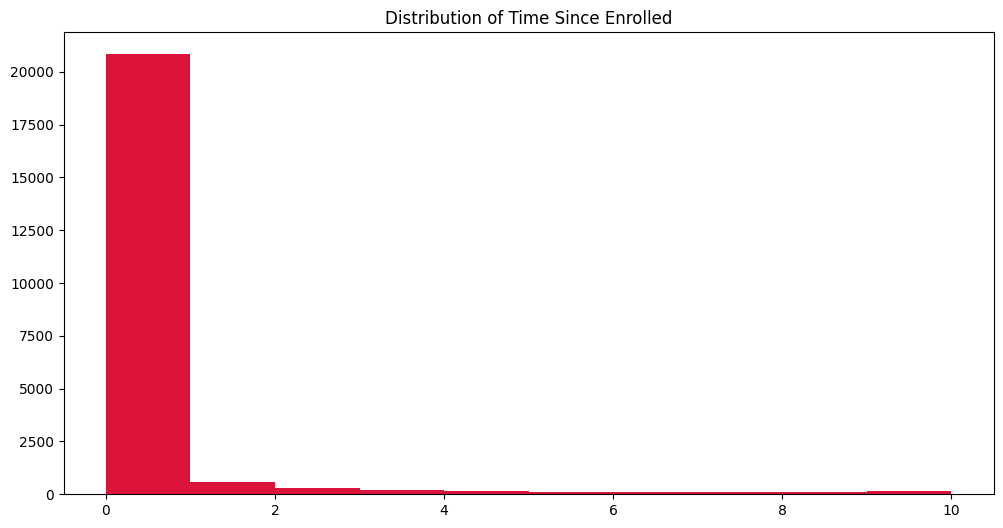

In [25]:
plt.figure(figsize=(12,6))
plt.hist(df['Date_Delta_in_Hour'].dropna(),color='#DC143C', range=[0,10])
plt.title('Distribution of Time Since Enrolled')
plt.show()

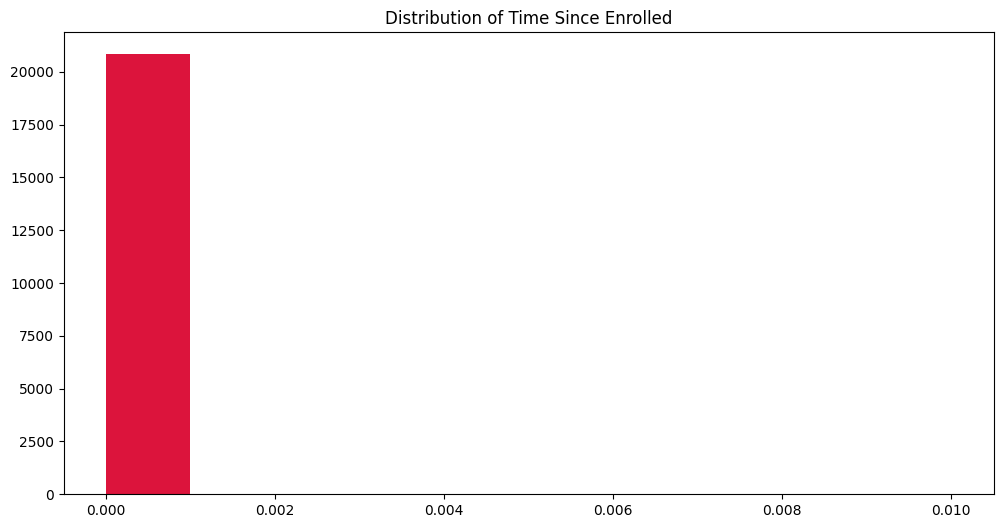

In [26]:
plt.figure(figsize=(12,6))
plt.hist(df['Date_Delta_in_Hour'].dropna(),color='#DC143C', range=[0,.01])
plt.title('Distribution of Time Since Enrolled')
plt.show()

***Here we conclude that most of users (more that 20000 out-off total 50000 users) do not used the 1st 24 hour premium free trial & infact they direcly jumped to the premium at the time of they 1st open the app***

We choose cut-off as 48 hours that is whoever difference is less than 48 is classified as enrolled else not

In [27]:
df.loc[df.Date_Delta_in_Hour>48, 'enrolled'] = 0

In [29]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled,enrolled_date,Date_Delta_in_Hour
0,235136,2012-12-27 02:14:00,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0,NaT,NaN
1,333588,2012-02-12 01:16:00,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,NaT,NaN
2,254414,2013-03-19 19:19:00,1,19,23,"Splash,Cycle,Loan",3,0,1,1,0,NaT,NaN
3,234192,2013-05-07 16:08:00,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,0,1,2013-05-07 16:11:00,0.0
4,51549,2013-02-26 18:50:00,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,1,0,1,2013-02-26 18:56:00,0.0


Feature Engineering - Independent *variables*

In [30]:
df.drop(columns=['first_open','enrolled_date','Date_Delta_in_Hour'],inplace=True)

In [31]:
# Formatting the screen_list field: We have popular screenlist file & we use it to create new columns & for rest we calculate
# their count
top_screens = pd.read_csv('top_screens.csv').top_screens.values
df['screen_list'] = df.screen_list.astype('str') + ','

# Here we create new columns of popular screen lists
for sc in top_screens:
    df[sc] = df.screen_list.str.contains(sc).astype(int)
    df['screen_list'] = df.screen_list.str.replace(sc+',','')

In [32]:
pd.read_csv('top_screens.csv').top_screens.head()

0               Loan2
1            location
2        Institutions
3    Credit3Container
4         VerifyPhone
Name: top_screens, dtype: object

In [33]:
# Here we create a new column which denotes all other screen count
df['Other_screens'] = df.screen_list.str.count(',')
# Also we gona drop the column of screen_list as it's not of importance
df.drop(columns=['screen_list'], inplace=True)

**`Funnels : Funnels are group of screens that belong to same set There are many screens that are correlated with eachother, and
we don''t want correlated screens coz it's not good idea for the model`**

In [34]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame', 'liked',
       'used_premium_feature', 'enrolled', 'Loan2', 'location', 'Institutions',
       'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [35]:
# Saving Screens
savings_screens = ['Saving1','Saving2','Saving2Amount','Saving4','Saving5','Saving6','Saving7','Saving8','Saving9','Saving10']
df['SavingsCount'] = df[savings_screens].sum(axis=1)
# Droping all the columns under savings_screens
df.drop(columns=savings_screens,inplace=True)

# Credit Monitoring Screens
cm_screens = ['Credit1','Credit2','Credit3','Credit3Container','Credit3Dashboard']
df['CMCount'] = df[cm_screens].sum(axis=1)
# Droping all the columns under cm_screens
df.drop(columns= cm_screens,inplace=True)

# Credit Card Screens
cc_screens = ['CC1','CC1Category','CC3']
df['CCCount'] = df[cc_screens].sum(axis=1)
# Droping all the columns under cc_screens
df.drop(columns= cc_screens,inplace=True)

# Loan Screens
loan_screens = ['Loan','Loan2','Loan3','Loan4']
df['LoanCount'] = df[loan_screens].sum(axis=1)
# Droping all the columns under loan_screens
df.drop(columns= loan_screens,inplace=True)

In [36]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame', 'liked',
       'used_premium_feature', 'enrolled', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other_screens',
       'SavingsCount', 'CMCount', 'CCCount', 'LoanCount'],
      dtype='object')

In [37]:
df.describe()

,user,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,enrolled,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other_screens,SavingsCount,CMCount,CCCount,LoanCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.165000,0.172020,0.477960,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.371184,0.377402,0.499519,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


**Data Preprocessing & Feature Scaling**

In [38]:
response = df['enrolled']
df.drop(columns='enrolled',inplace=True)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, response, test_size=0.2, random_state=0)

In [40]:
# we can not put user id in our model & also can not drop it as it is an identifier for each user, so let's keep it some where
# as variable
train_id = X_train['user']
X_train.drop(columns='user',inplace=True)

test_id = X_test['user']
X_test.drop(columns='user',inplace=True)

We will scale the features using StandardScalar to avoid the dominance of perticular feature in entire model

In [41]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = pd.DataFrame(sc_X.fit_transform(X_train),columns=df.columns[1:])
X_test = pd.DataFrame(sc_X.transform(X_test),columns=df.columns[1:])

In [42]:
X_train.head(2)

,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other_screens,SavingsCount,CMCount,CCCount,LoanCount
0,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.246319,2.186018,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,1.785389
1,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.445173,-0.457453,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,-0.289185,0.309800


In [43]:
X_test.head(2)

,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other_screens,SavingsCount,CMCount,CCCount,LoanCount
0,-1.489818,-1.553579,0.856728,0.819520,-0.34683,2.246319,-0.457453,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.296641,-0.260877,-0.763372,-0.289185,-1.165789
1,0.972325,-0.881364,-0.528611,0.564865,-0.34683,-0.445173,-0.457453,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.753543,-0.260877,-0.763372,-0.289185,0.309800


In [44]:
X_train.shape, X_test.shape

((40000, 48), (10000, 48))

**Logistic Regression Model**

**Model Training**

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

param_grid = {'C':[100,10,1,.1,.01,.001], 'penalty' : ['l1','l2']}
log_model = GridSearchCV(LogisticRegression(C=1),param_grid=param_grid)
log_model.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(C=1),
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'penalty': ['l1', 'l2']})

In [46]:
log_model.best_params_

{'C': 100, 'penalty': 'l2'}

In [48]:
for params, score in zip(log_model.cv_results_['params'],log_model.cv_results_['mean_test_score']):
    print(params,score)

{'C': 100, 'penalty': 'l1'} nan
{'C': 100, 'penalty': 'l2'} 0.77705
{'C': 10, 'penalty': 'l1'} nan
{'C': 10, 'penalty': 'l2'} 0.77705
{'C': 1, 'penalty': 'l1'} nan
{'C': 1, 'penalty': 'l2'} 0.7769999999999999
{'C': 0.1, 'penalty': 'l1'} nan
{'C': 0.1, 'penalty': 'l2'} 0.777025
{'C': 0.01, 'penalty': 'l1'} nan
{'C': 0.01, 'penalty': 'l2'} 0.7769999999999999
{'C': 0.001, 'penalty': 'l1'} nan
{'C': 0.001, 'penalty': 'l2'} 0.773525


***we will use 'L1' penalty as we might have correlated features like screens & 'L1' penalises any such fields that are strongly
correlated with response variable, this is because there will always be one screen that is just before the enrollment screen which imply that the correlation will be higher for that screen with enrollment screen ==> higher weight to that screen***

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=100, penalty='l1', solver='liblinear')
classifier.fit(X_train, y_train)


LogisticRegression(C=100, penalty='l1', solver='liblinear')

**Model Evaluation & Predictions**

***Python based Confusion Matrix***

|       |       | Predicted     |                 |
| ----- |-------|---------------|-----------------|
|       |       | 0             | 1               |
|Actual | 0     |True Negatives | False Positives |
|       | 1     |False Negatives| True Positives  |


In [52]:
y_pred = classifier.predict(X_test)

Out of 2154 Users..


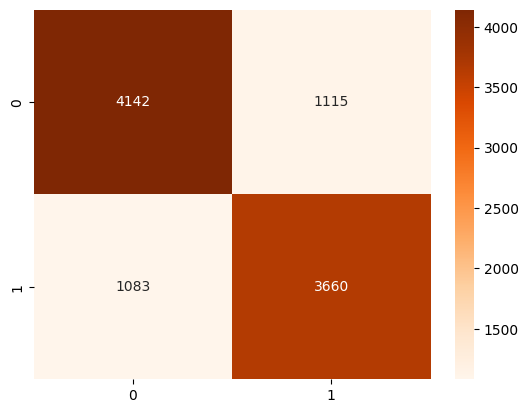

In [53]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test,y_pred)
print('Out of 2154 Users..')
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges')
plt.show()

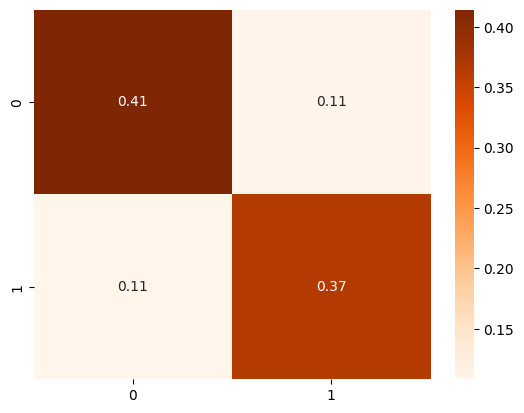

In [54]:
sns.heatmap(cm/cm.sum(),annot=True,cmap='Oranges')
plt.show()

- Model Accuracy = sum of diagonal value of cm/sum of all values of cm(confusion matrix)
- We also look for Precision to insure that model accuracy is inceased not because of some overfitting issues
- Precision Score = True Positive / (True Positive + False Positive), meaning that out-of all predicted positives what percentage are Actual positives
- Recall Score = True Positives / (True Positives + False Negatives, meaning that out-of all Actual Positives What Percentage are predicted to be positives
- We will also calculate f1-score as it creates a balance between Precision & Recall coz it is weighted average of Precision & Recall thereby it considers both False Positives & Flase Negative Intuitively f1-score is not easy to understand as accuracy but it is much better metric in case of class imbalanced data as in our case
- F1-Score = Precision*Recall / (Precision+Recall)

In [55]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test,y_pred)
print('Classification Report: ','\n',classification_report(y_test,y_pred))

print('Model Accuracy :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print('Recall Score : ',recall_score(y_test,y_pred))
print('F1-Score : ',f1_score(y_test,y_pred))

Classification Report:  
               precision    recall  f1-score   support

           0       0.79      0.79      0.79      5257
           1       0.77      0.77      0.77      4743

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

Model Accuracy : 0.7802
Precision Score : 0.7664921465968586
Recall Score :  0.7716635041113219
F1-Score :  0.7690691321706241


**Sensitivity or TPR = TP/(TP+FN)**      

**Specificity = TN/(TN+FP),  (1-Specificity)=FPR**

In [57]:
Sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
Specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print('% of comapanies correctely identified who withdrawal from rating: ',Sensitivity,
      ',  % of comapanies correctely identified who not withdrawal from rating: ',Specificity)

% of comapanies correctely identified who withdrawal from rating:  0.7716635041113219 ,  % of comapanies correctely identified who not withdrawal from rating:  0.7879018451588359


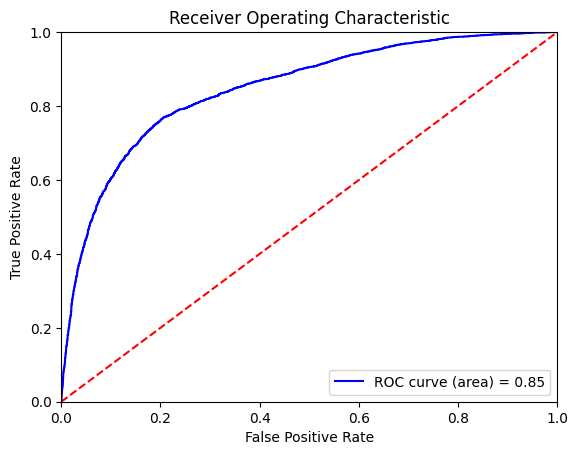

In [58]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
y_prob = classifier.predict_proba(X_test)
preds = y_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'ROC curve (area) = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Here Area under ROC curve covers 85% which implies that the 85% of time model distinguish the 2 classes correctly**

---
**Predictions**

In [59]:
enrollmeant_Prob = classifier.predict_proba(X_test)
enrollmeant_Prob

array([[0.1190459 , 0.8809541 ],
       [0.3915498 , 0.6084502 ],
       [0.92172425, 0.07827575],
       ...,
       [0.92670978, 0.07329022],
       [0.38368673, 0.61631327],
       [0.54968977, 0.45031023]])

In [60]:
enrollmeant_Prob[:,1]

array([0.8809541 , 0.6084502 , 0.07827575, ..., 0.07329022, 0.61631327,
       0.45031023])

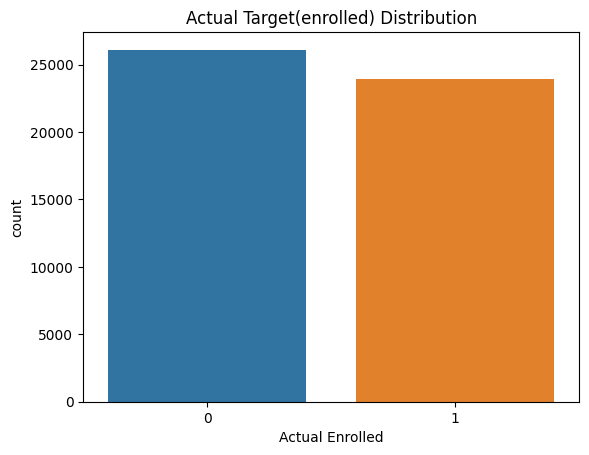

In [62]:
sns.countplot(x = response,data = df)
plt.title('Actual Target(enrolled) Distribution')
plt.xlabel('Actual Enrolled')
plt.show()

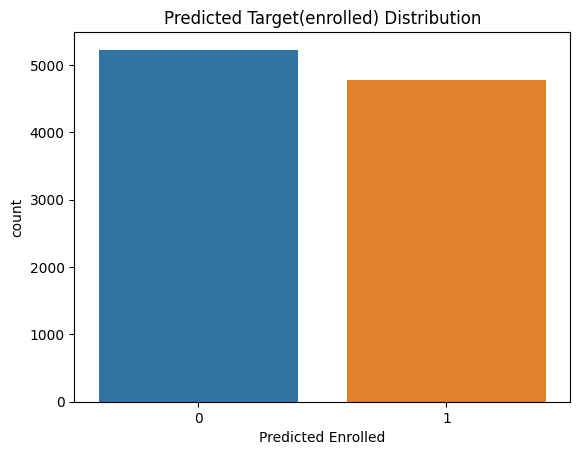

In [63]:
sns.countplot(x = pd.DataFrame(classifier.predict(X_test))[0])
plt.title('Predicted Target(enrolled) Distribution')
plt.xlabel('Predicted Enrolled')
plt.show()

`From both the plots we can conclude that both Actual & Predicted values follows same class distribution`

In [64]:
weights = pd.Series(classifier.coef_[0],index=X_train.columns.values)
weights.sort_values(ascending = False)

Other_screens              0.954185
VerifyPhone                0.670555
CMCount                    0.621183
VerifyMobile               0.318668
idscreen                   0.152809
VerifyDateOfBirth          0.135392
VerifyAnnualIncome         0.084364
VerifyHousing              0.058069
BankVerification           0.052292
Rewards                    0.044545
VerifyHousingAmount        0.042211
EditProfile                0.042008
Splash                     0.037826
CCCount                    0.025298
dayofweek                  0.019868
SecurityModal              0.014912
liked                      0.012868
Finances                   0.011802
Cycle                      0.009836
ProfileEducation           0.008091
RewardDetail               0.000223
ProfileChildren            0.000000
NetworkFailure            -0.002067
Leaderboard               -0.008038
RewardsContainer          -0.010447
ProfileJobTitle           -0.012502
SavingsCount              -0.013545
location                  -0

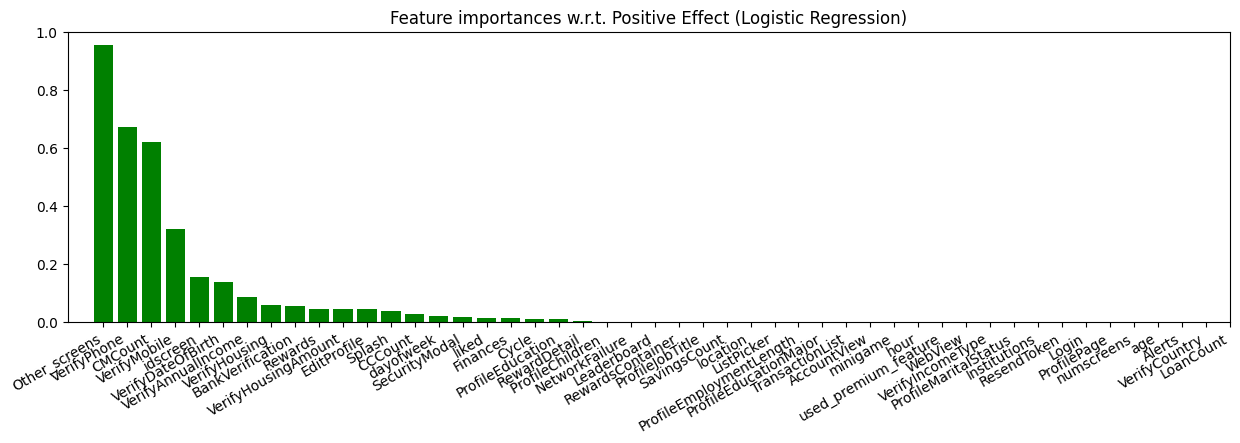

In [67]:
coefs = classifier.coef_[0]
indices = np.argsort(coefs)[::-1]

plt.figure(figsize=(15,5))
plt.title("Feature importances w.r.t. Positive Effect (Logistic Regression)")
plt.bar(range(22), coefs[indices[:22]],
       color="g", align="center")
sorted_indices = weights.sort_values(ascending=False).index
plt.xticks(range(len(sorted_indices)), sorted_indices, rotation=30, ha='right')
plt.subplots_adjust(bottom=0.3)

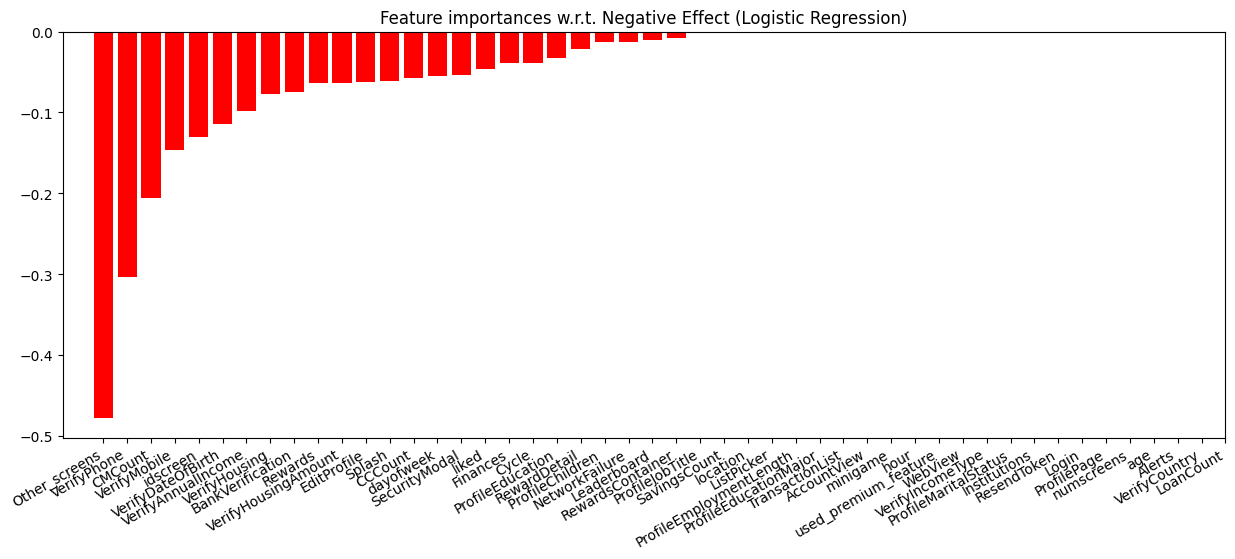

In [68]:
coefs = classifier.coef_[0]
indices = np.argsort(coefs)

plt.figure(figsize=(15,7))
plt.title("Feature importances w.r.t. Negative Effect (Logistic Regression)")
plt.bar(range(26), coefs[indices[:26]],
       color="r", align="center")
sorted_indices = weights.sort_values(ascending=False).index
plt.xticks(range(len(sorted_indices)), sorted_indices, rotation=30, ha='right')
plt.subplots_adjust(bottom=0.3)

 **Conclusion & Final Results**
- **Positively Affecting features to enrollment:** Other_sceens, VerifyPhone, CMCount, VerifyMobile, VerifyDateOfBirth, Rewards, EditProfile, etc, without any doubt all above features are situated to moving towards the enrollment screens.
- **Negatively Affecting features to enrollment:** LoanCount, VerifyCountry, Alerts, age, numscreens, Login, ResendToken, etc, if we see all these features are irritating & no user want to do this.

In [69]:
Final_Results = pd.concat([y_test,test_id],axis=1).dropna()

In [70]:
Final_Results['enrollment_Prob'] = enrollmeant_Prob[:,1]
Final_Results['Predicted Results'] = y_pred

**Here below we can see users with highest probability in enrolling into the Premium features of App**

In [71]:
Final_Results = Final_Results[['user','enrolled','Predicted Results','enrollment_Prob']].reset_index(drop=True)
Final_Results.sort_values(by ='enrollment_Prob',  ascending = False)

,user,enrolled,Predicted Results,enrollment_Prob
1849,319395,1,1,0.996379
6018,246990,0,1,0.994527
2822,131939,1,1,0.994454
9420,148005,1,1,0.994274
6386,128129,0,1,0.991396
...,...,...,...,...
205,330098,0,0,0.012502
3899,30755,0,0,0.011527
4113,163067,0,0,0.011431
9142,345238,0,0,0.008833
